In [1]:
#Importando as bibliotecas

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ccdata/CC GENERAL.csv


# Lendo o dataset

In [2]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data Processing

Verificando se existe valor nulo

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Como existem muitos valores nulos na coluna MINIMUM_PAYMENTS, ecolhi por preencher os valores nulos com a mediana

In [5]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

Olhando novamente se existe valores nulos. Como só existe uma linha com valor nulo na coluna CREDIT_LIMIT, dessa vez irei excluir a linha do dataset

In [6]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
#Dropando as linhas que possuem valores nulos (nesse caso, um só)
df = df.dropna()

Agora, verifico que não existe mais nenhum valor nulo no dataset

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Analisando o dataset
Pensando em agrupar os clientes com corportamento parecido baseado nas compras, reservas, etc, a coluna CUST_ID não será útil para essa análise, então eu excluo ela do dataset

In [9]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
df = df.drop(columns='CUST_ID')

In [11]:
#Salvando as colunas do dataframe
cols = df.columns
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Analisando o histograma por inspeção visual, é possível ver que existem comportamentos diferentes entre os clientes, o que pode ajudar a dividí-los em grupos

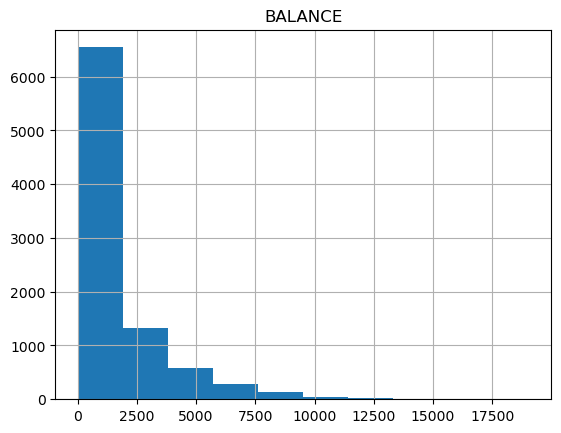

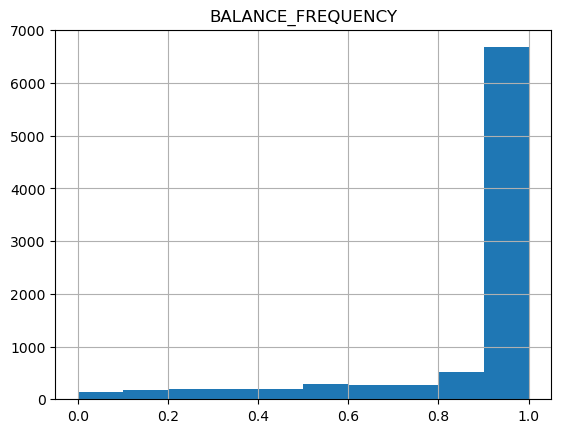

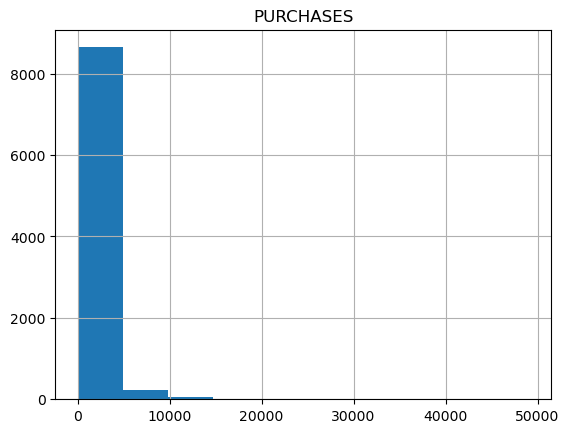

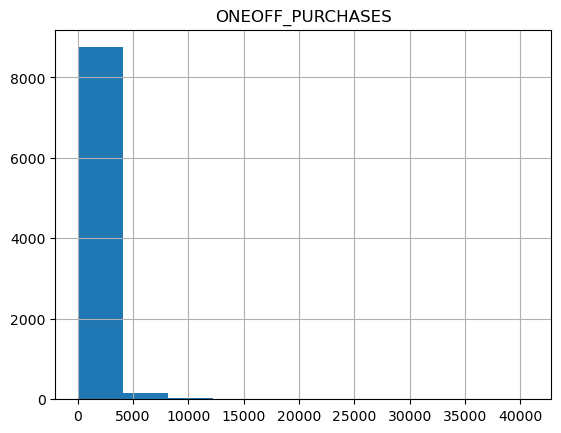

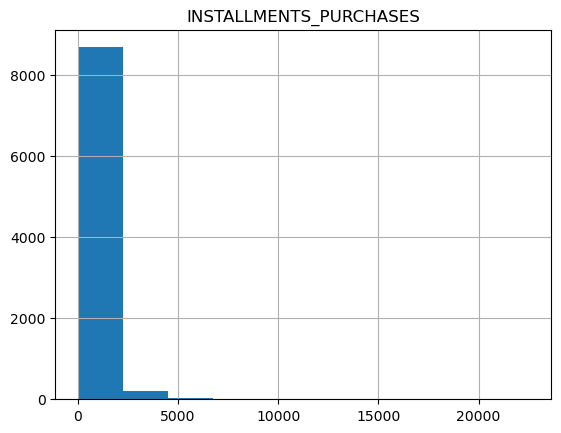

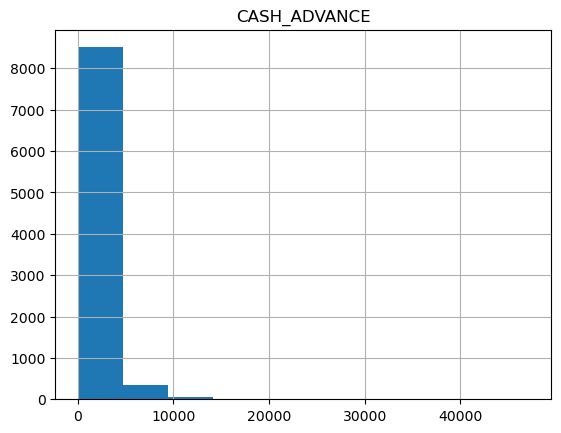

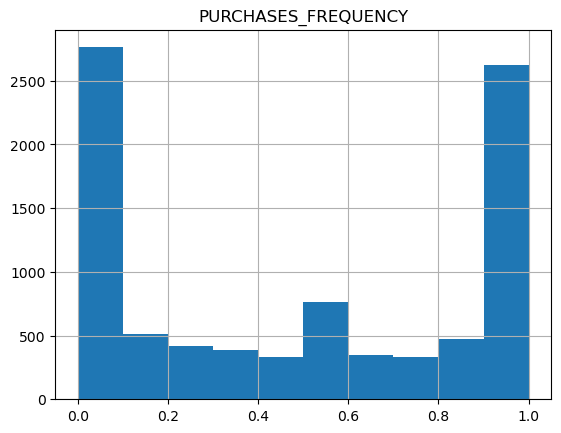

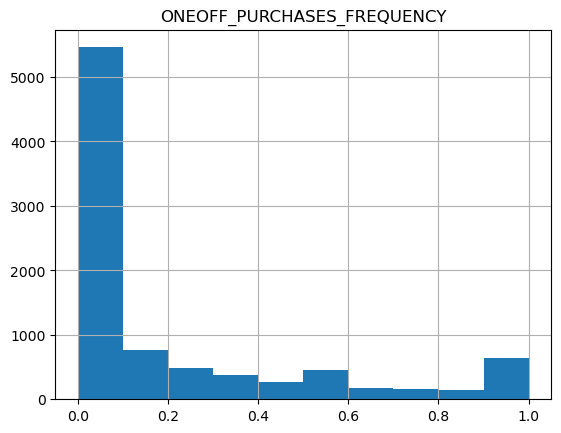

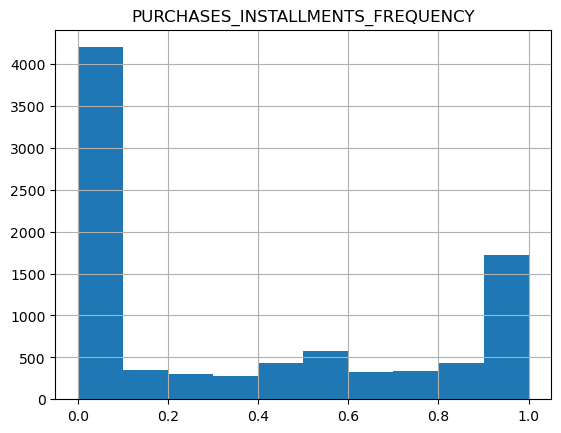

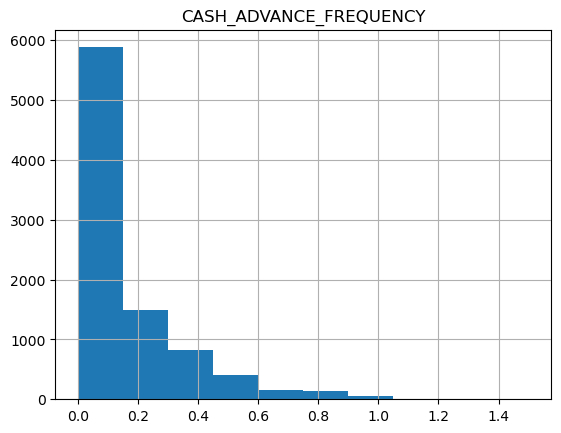

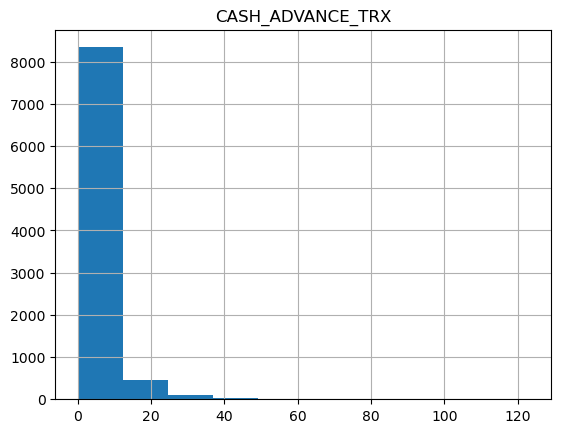

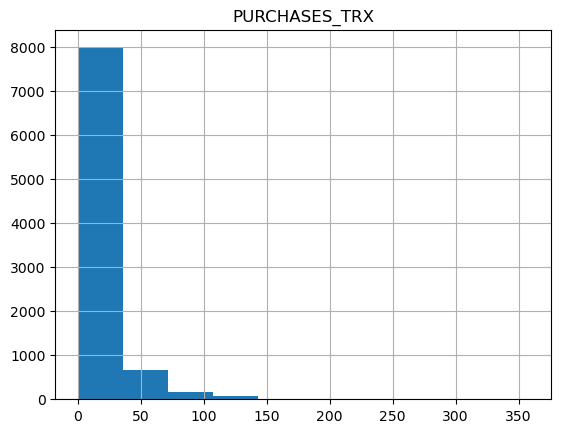

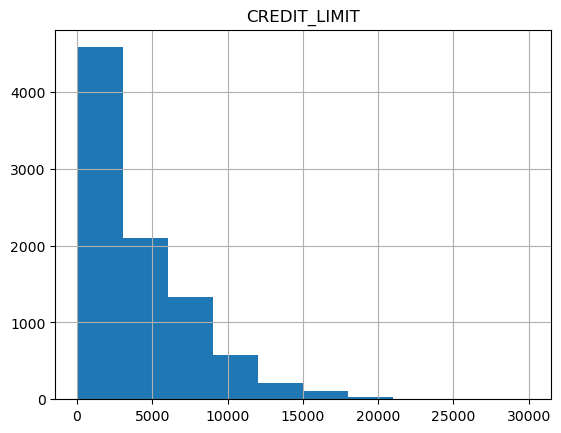

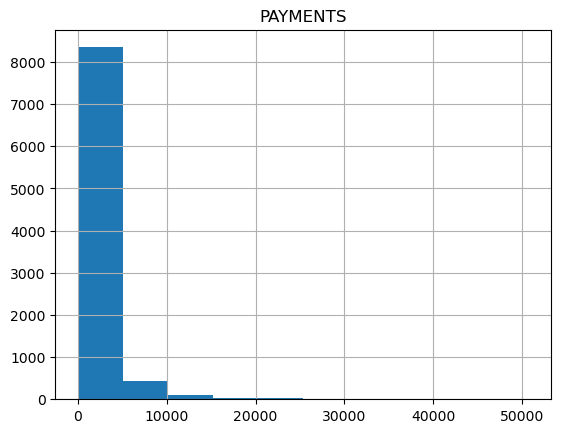

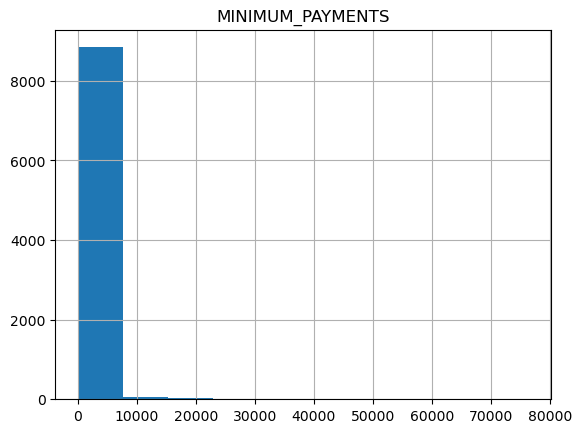

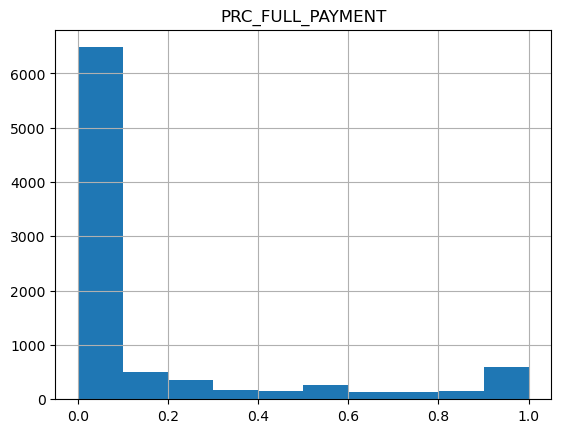

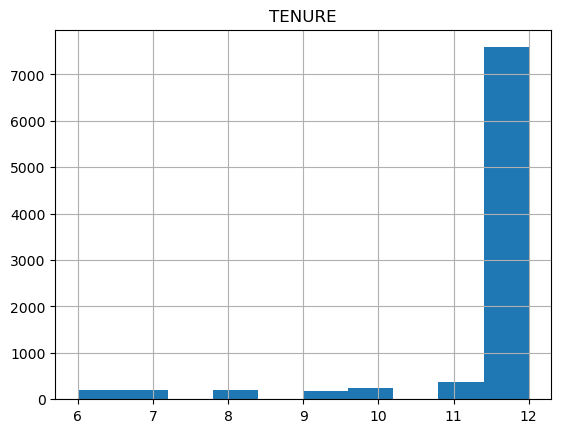

In [12]:
for column in cols:
    df.hist(column=column)

In [13]:
#Fazendo a normalização
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [14]:
#Recuperando as labels do dataframe original
df = pd.DataFrame(df, columns=cols)

Utilizando o PCA, vou verificar o valor da variância para ver se posso descartar alguma variável de entrada

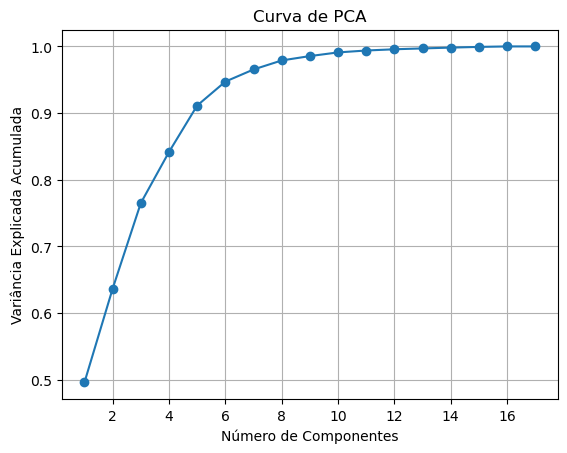

In [15]:
pca = PCA()

dados_transformados = pca.fit_transform(df)

var_exp_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(var_exp_acumulada) + 1), var_exp_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Curva de PCA')
plt.grid(visible=True,zorder=1)
plt.show()

Olhando o gráfico, é possível perceber que com 8 componentes, já é possível descrever mais ou menos 97% do dataset

In [16]:
#Diminuindo o número de componentes
pca = PCA(n_components=8)
x = pca.fit_transform(df)

In [17]:
#Método do cotovelo
distorsions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=666, n_init="auto")
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

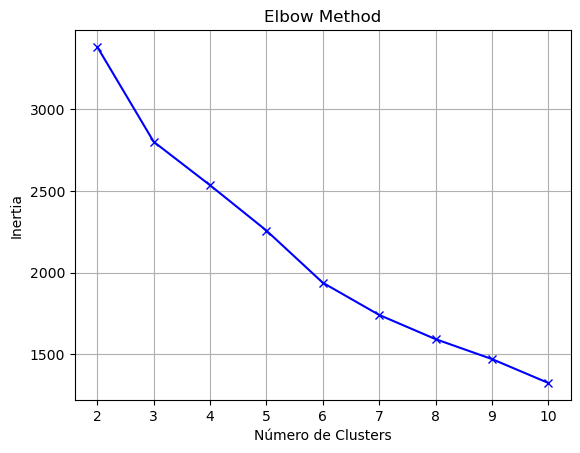

In [18]:
k_values = range(2, 11)
plt.plot(k_values, distorsions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(visible=True,zorder=1)
plt.show()

Pelo método do cotovelo, o número ideal de clusters é 6

In [19]:
#Clusterização
kmeans = KMeans(n_clusters=6, random_state=666, n_init="auto")
kmeans.fit(x)

KMeans(n_clusters=6, n_init='auto', random_state=666)

In [20]:
#Usando o PCA para reduzir pra duas variáveis e poder fazer o plot para a visualização dos clusters
dist = 1 - cosine_similarity(x)

pca = PCA(n_components=2)
pca.fit(dist)
x_pca = pca.transform(dist)

In [21]:
#Recuperando as labels
labels = kmeans.predict(x)

In [22]:
#Concatenando as labels no dataframe original
df = scaler.inverse_transform(df)
df = pd.DataFrame(df, columns=cols)
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1


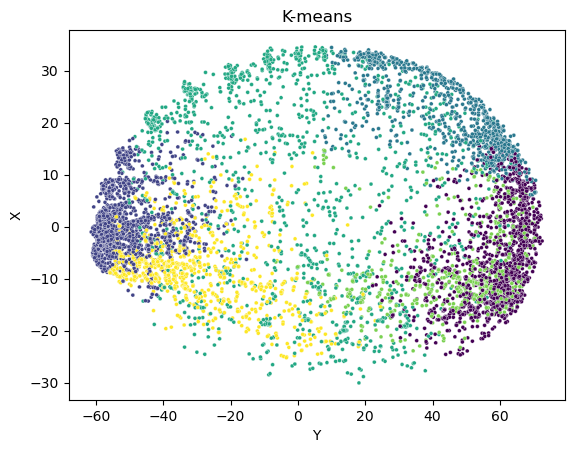

In [23]:

scatter = sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], c=labels, s=8)

scatter.set_xlabel('Y')
scatter.set_ylabel('X')
scatter.set_title('K-means')

plt.show()

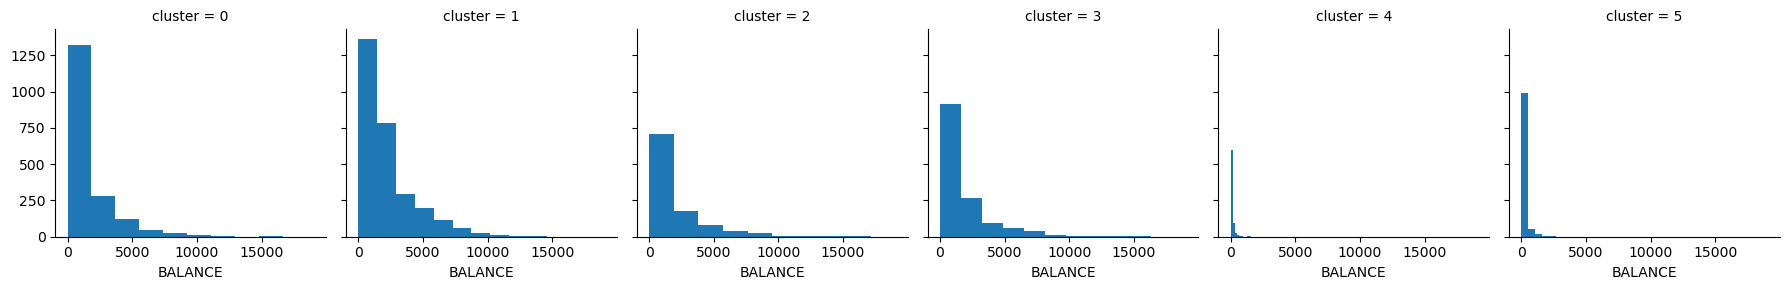

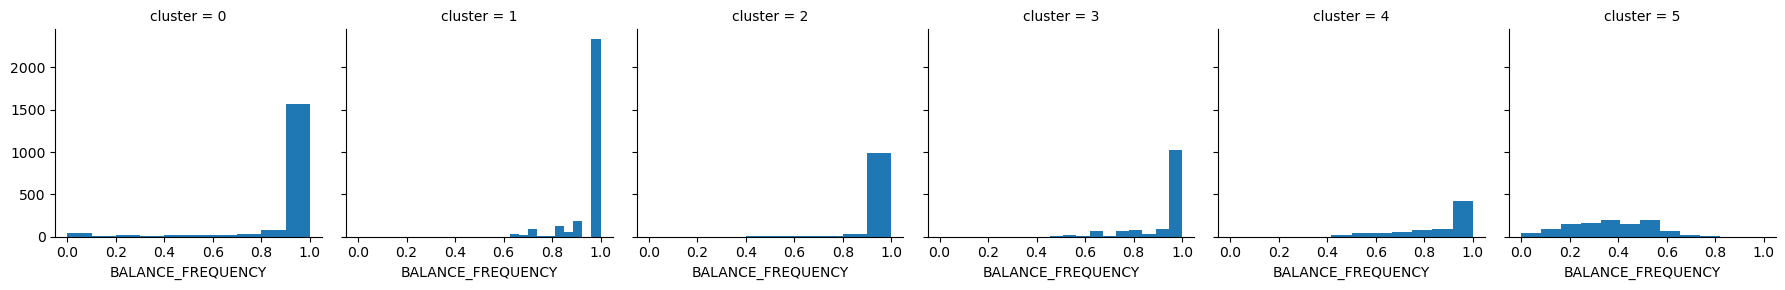

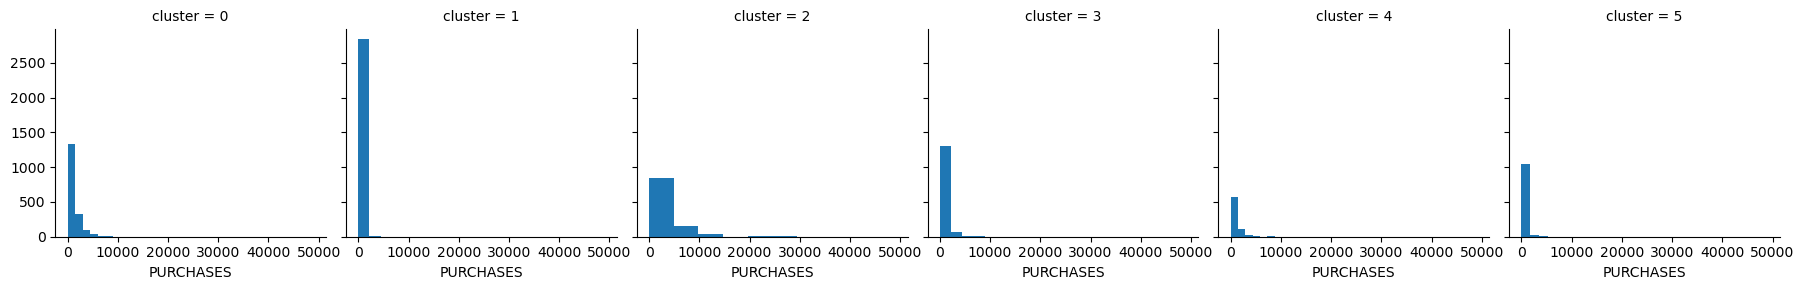

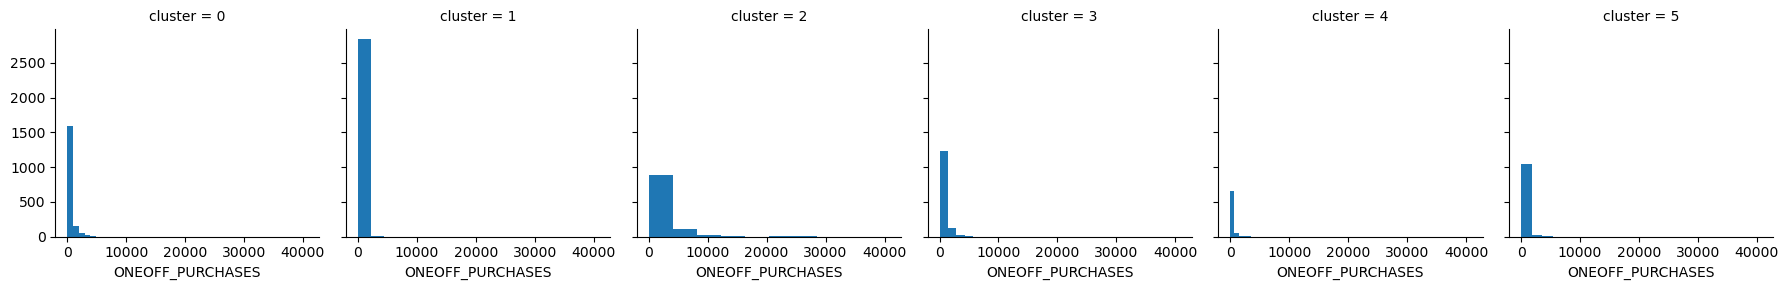

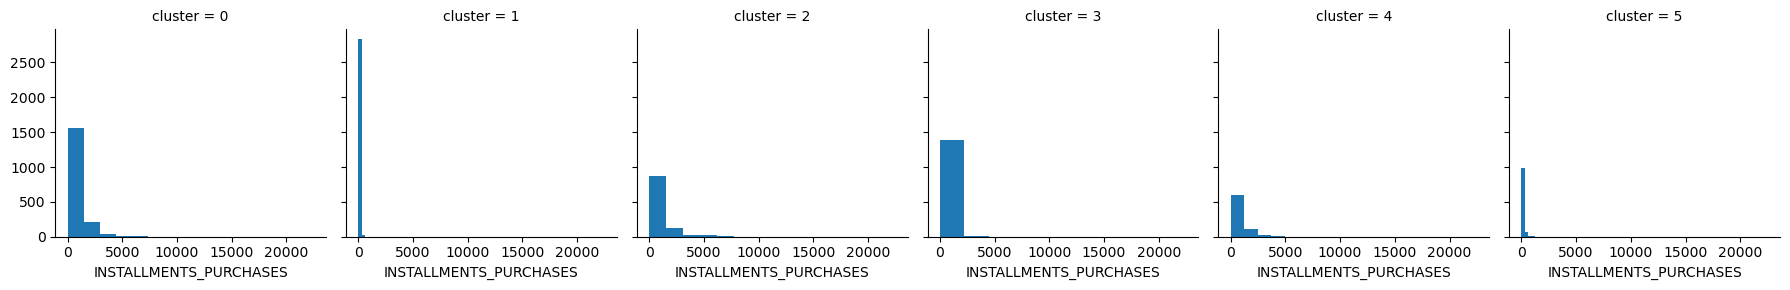

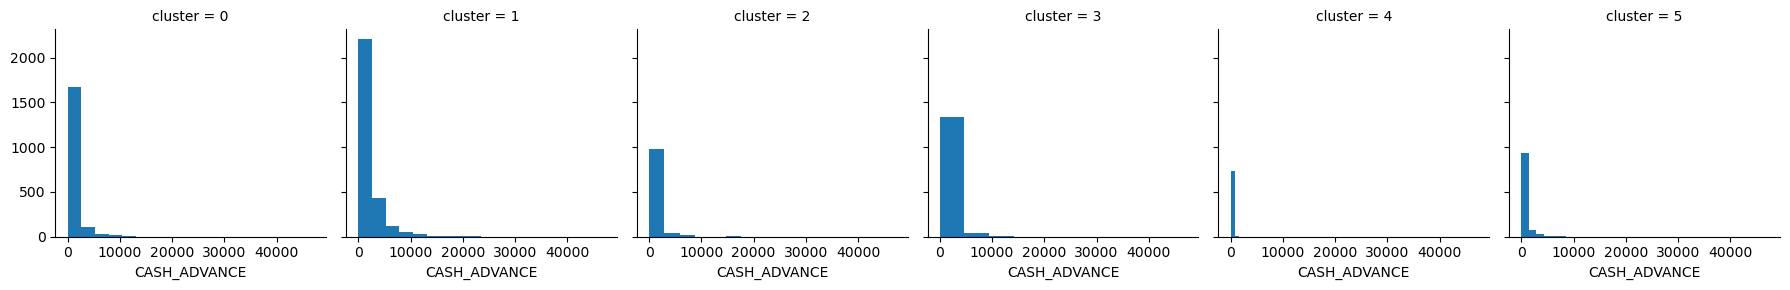

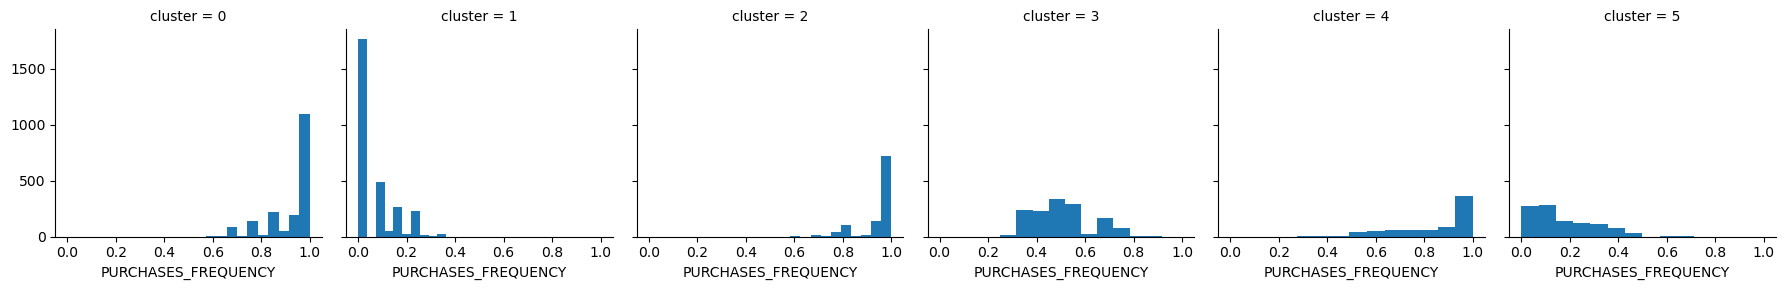

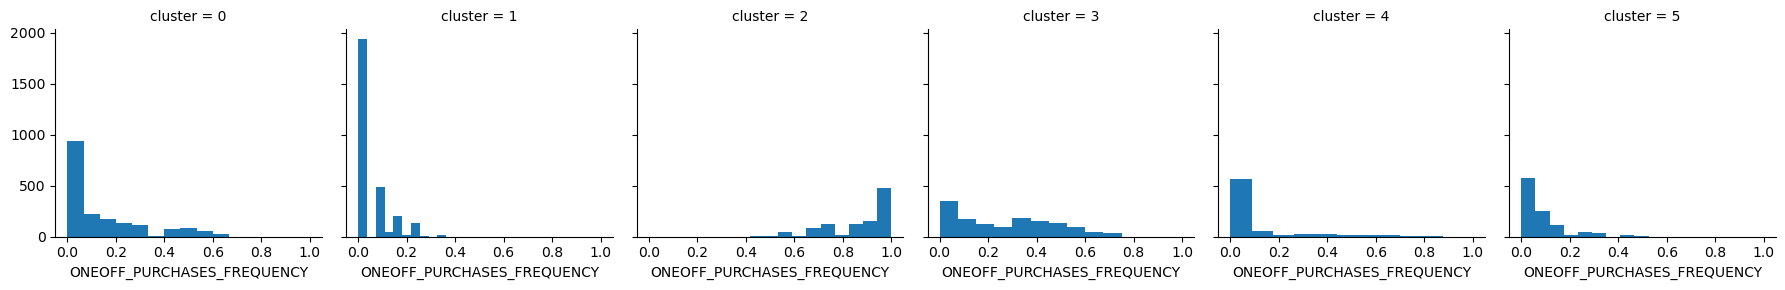

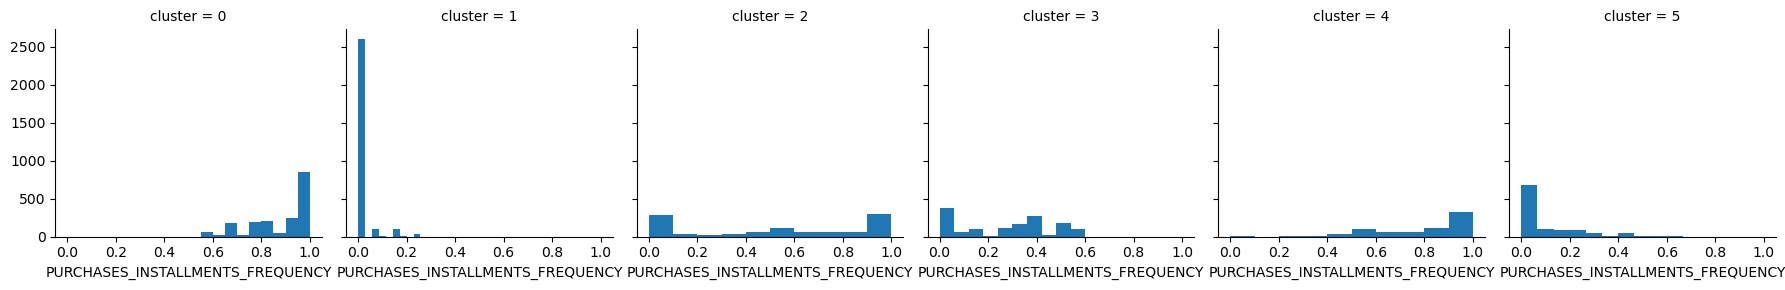

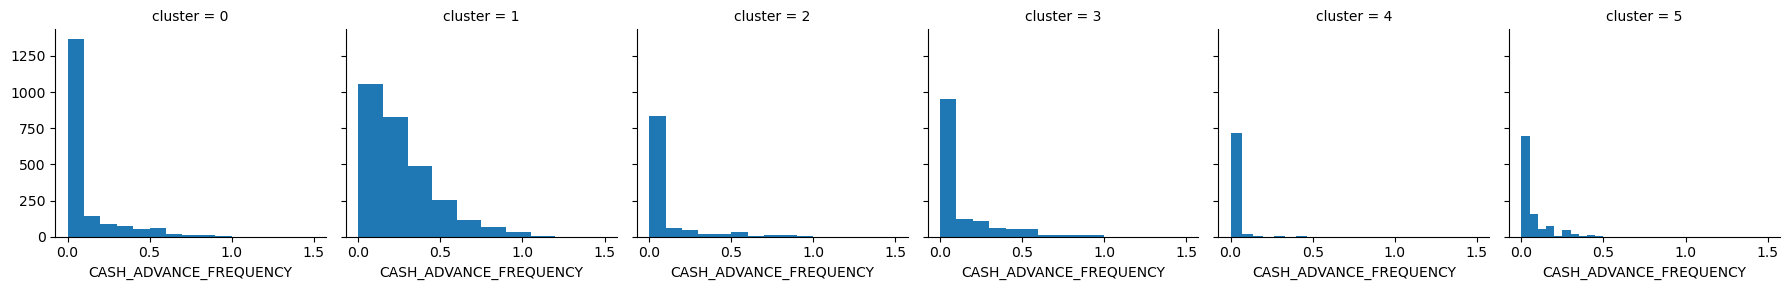

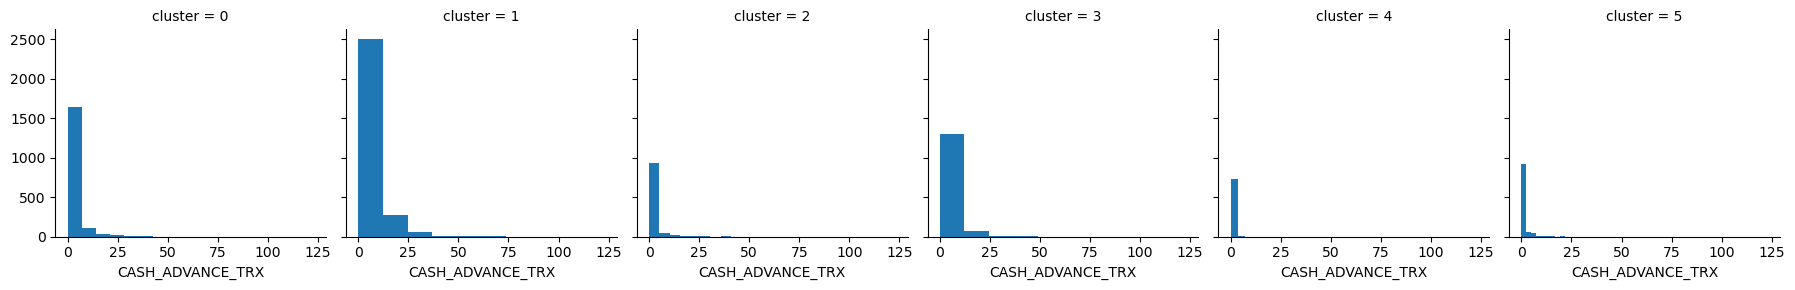

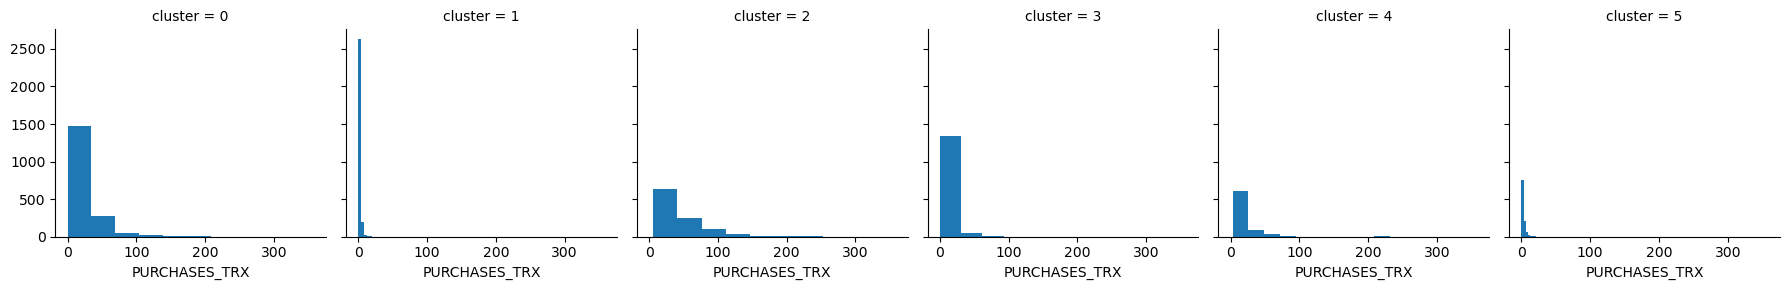

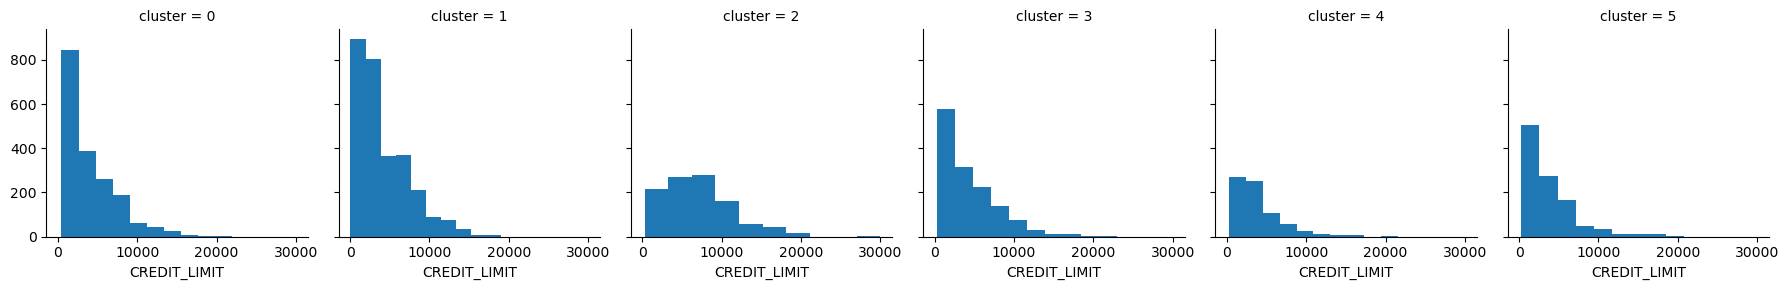

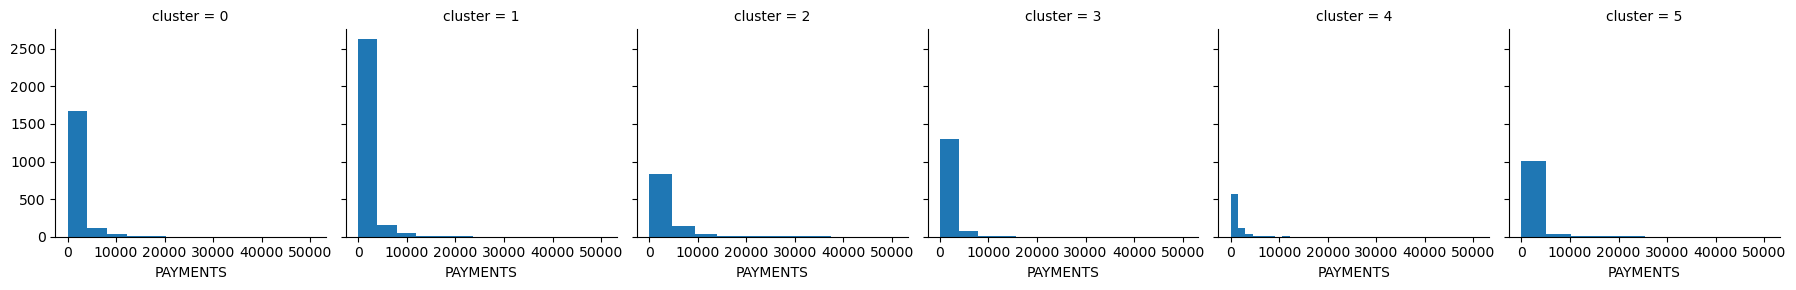

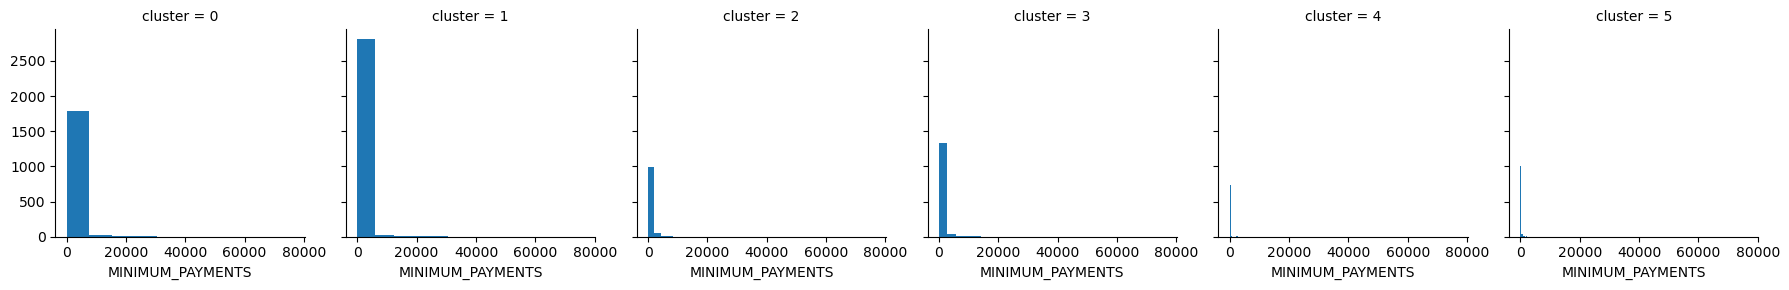

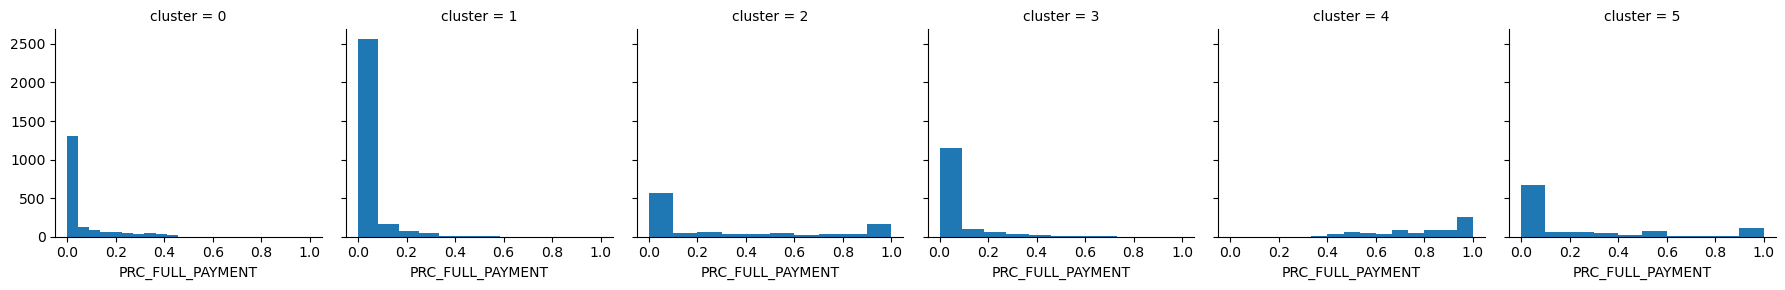

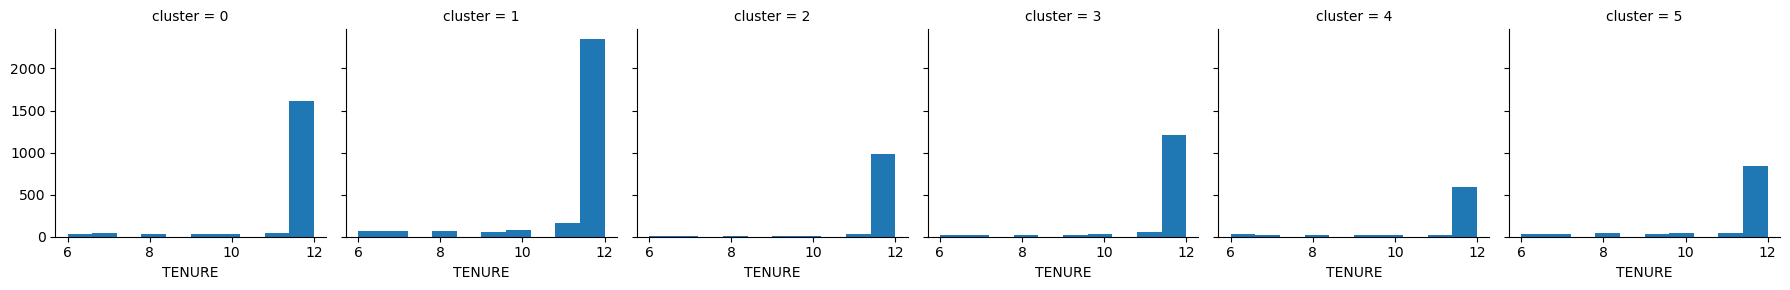

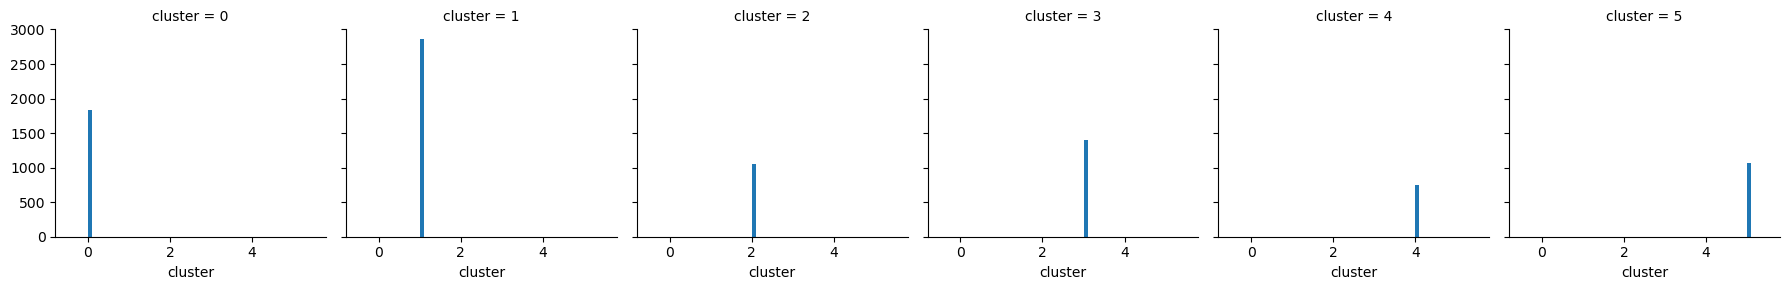

In [24]:
#Analisando o comportamento de cada atributo do dataset por cluster, com o objetivo de traçar o perfil de usuário para cada cluster
for k in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, k)

De acordo com os gráficos acima, a conclusão tirada dos perfis de usuários por cluster foi a seguinte:

Cluster 0 - Pessoas com saldo médio que é atualizado com frequência. Fazem muitas compras parceladas, possuem o cartão há muito tempo e possuem um limite baixo no cartão de crédito

Cluster 1 - Pessoas com saldo médio que é atualizado com muita frequência. Não fazem muitas compras, mas possuem o cartão há muito tempo e possuem um limite baixo no cartão de crédito

Cluster 2 - Pessoas com saldo médio que é atualizado com frequência. Fazem muitas compras, a maioria à vista, mas também compram parcelado e possuem um limite médio no cartão de crédito

Cluster 3 - Pessoas com saldo baixo que é atualizado com frequência. Fazem compras moderadas, à vista e parcelado, e possuem um limite médio no cartão de crédito

Cluster 4 - Pessoas com saldo baixo que é atualizado com frequência. Fazem muitas compras parceladas e possuem um limite médio no cartão de crédito

Cluster 5 - Pessoas com saldo baixo que não é atualizado com frequência. Não fazem muitas compras, mas a maioria que fazem são parceladas e possuem um limite baixo no cartão de crédito

In [25]:
pip install fuzzy-c-means

  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kfp 1.8.21 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [26]:
#Importando o Fuzzy K-means para comparação
from fcmeans import FCM

In [27]:
#Fuzzy K-means

fcm=FCM(n_clusters=6,
        max_iter=100,
        error = 1e-09,
        random_state = 666
       )

In [28]:
#Clusterizando e recuperando as labels dos clusters mais prováveis
fcm.fit(np.array(x))
centers = fcm.centers
labels = fcm.predict(np.array(x))

/tmp/ipykernel_20/2602137770.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], c=labels, s=8, palette=colors)


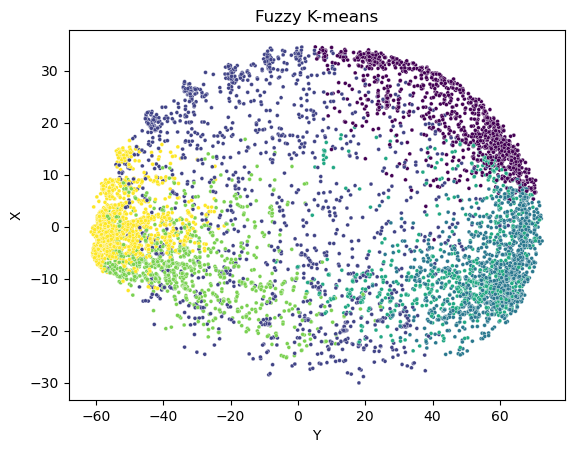

In [29]:
#Plotando a distribuição de pontos para o fuzzy
colors = ['red', 'blue', 'green', 'yellow', 'purple']

scatter = sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], c=labels, s=8, palette=colors)

scatter.set_xlabel('Y')
scatter.set_ylabel('X')
scatter.set_title('Fuzzy K-means')

plt.show()

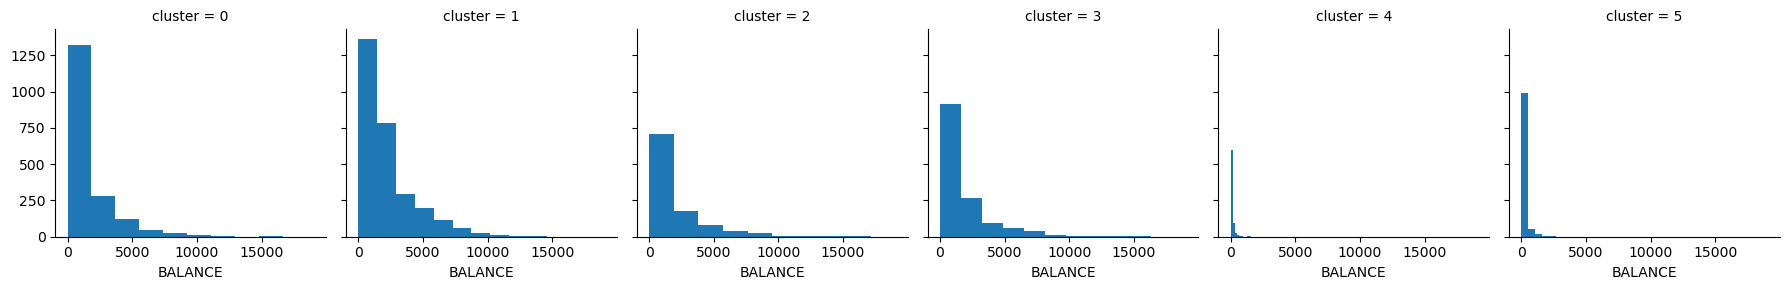

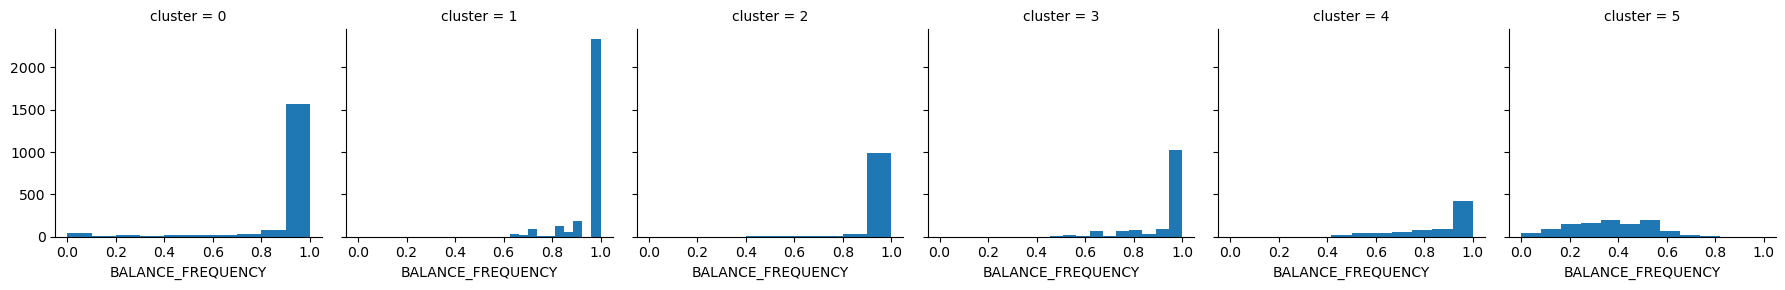

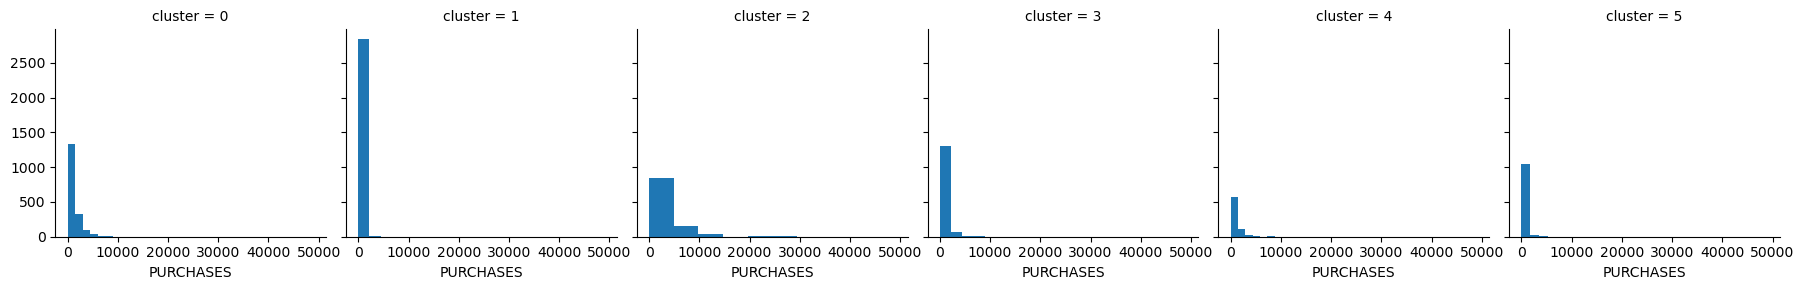

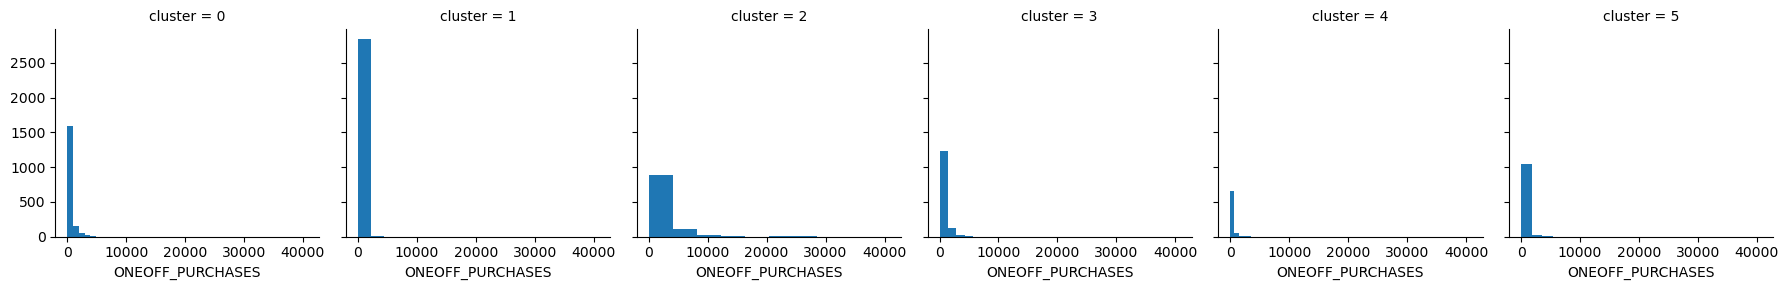

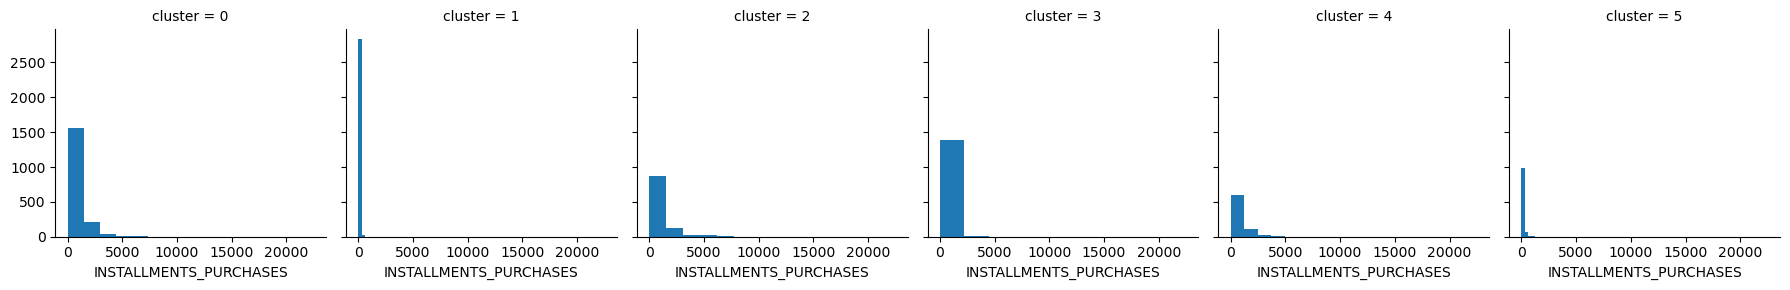

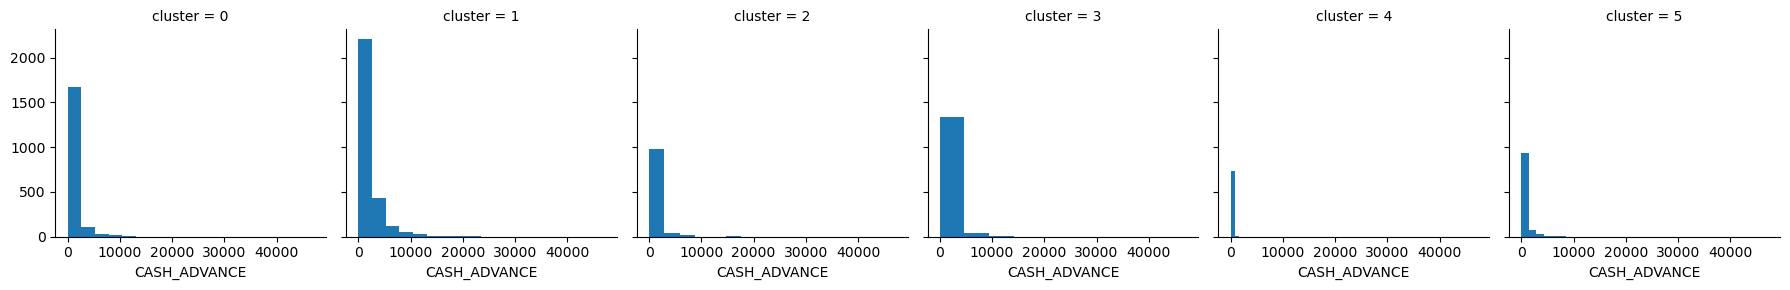

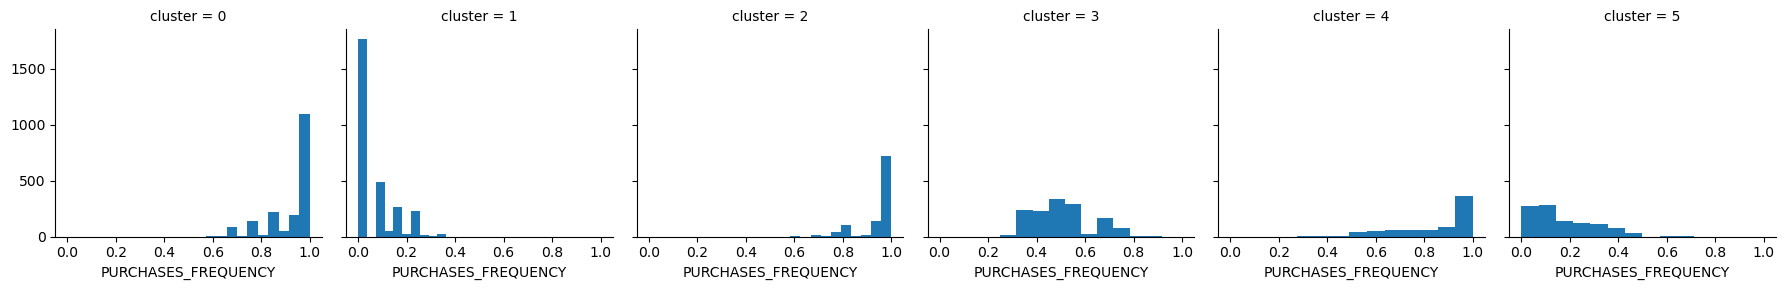

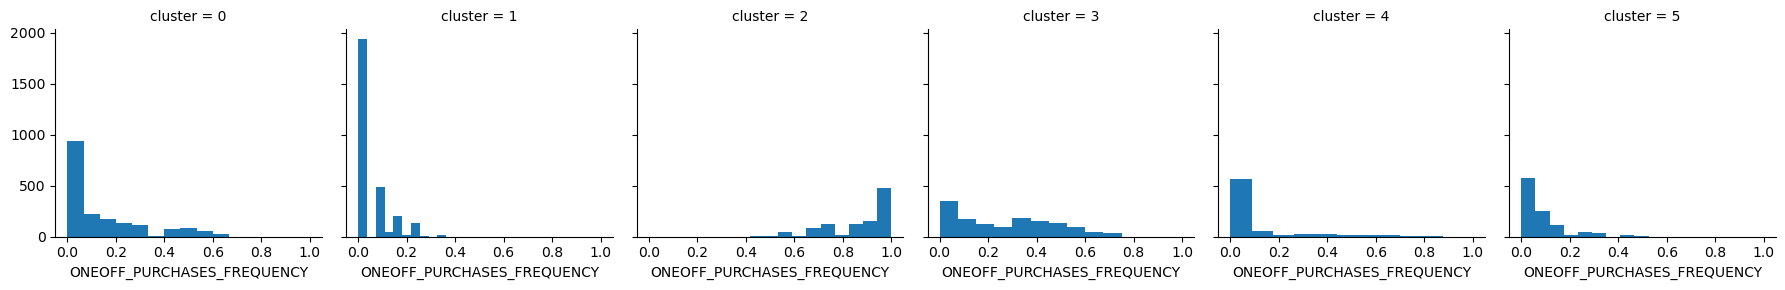

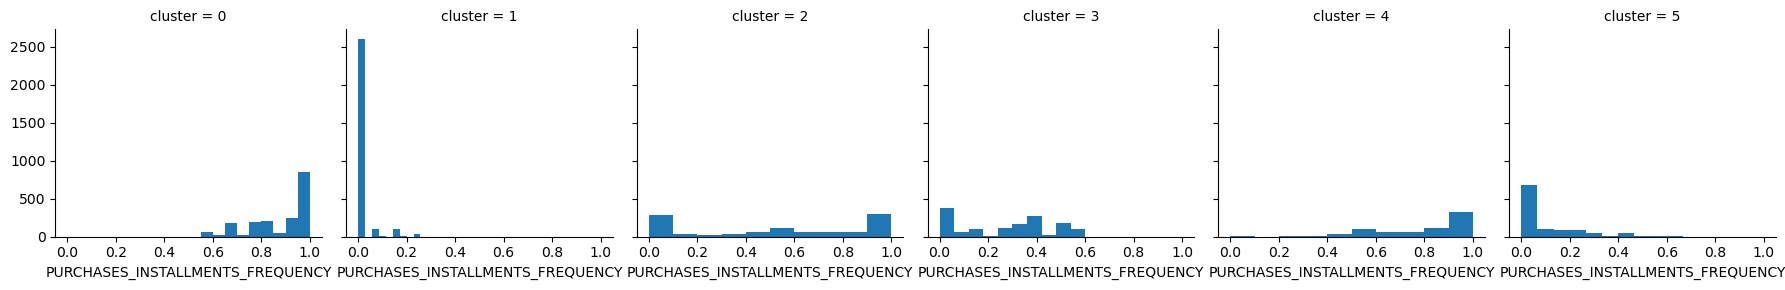

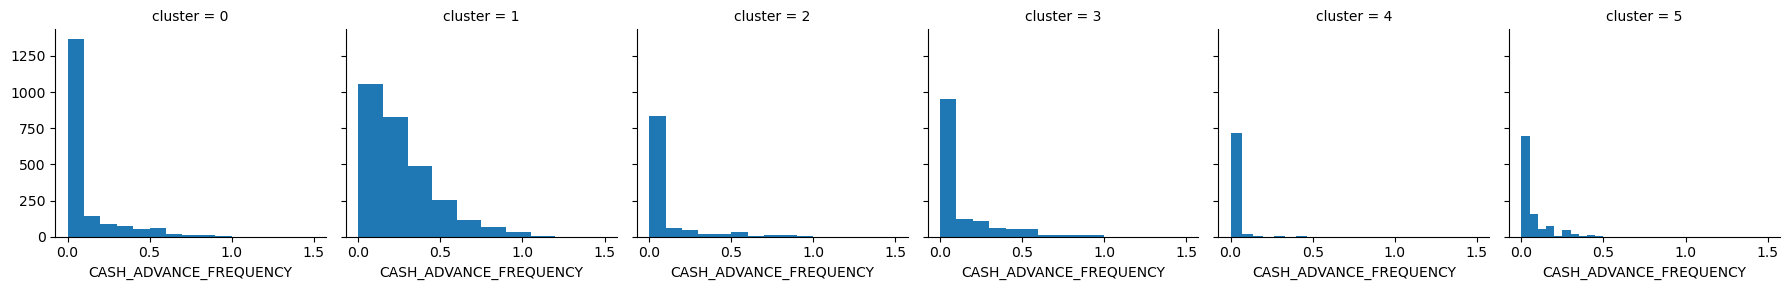

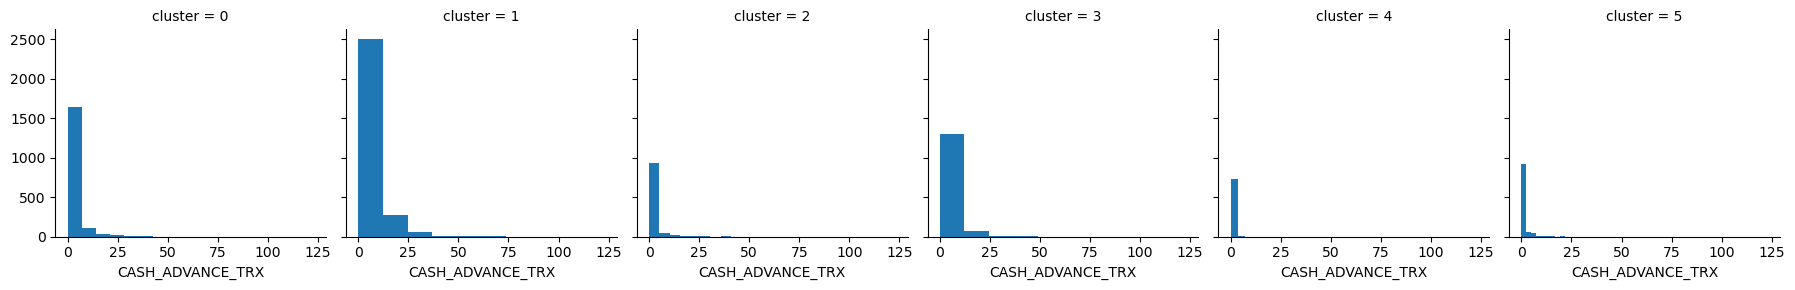

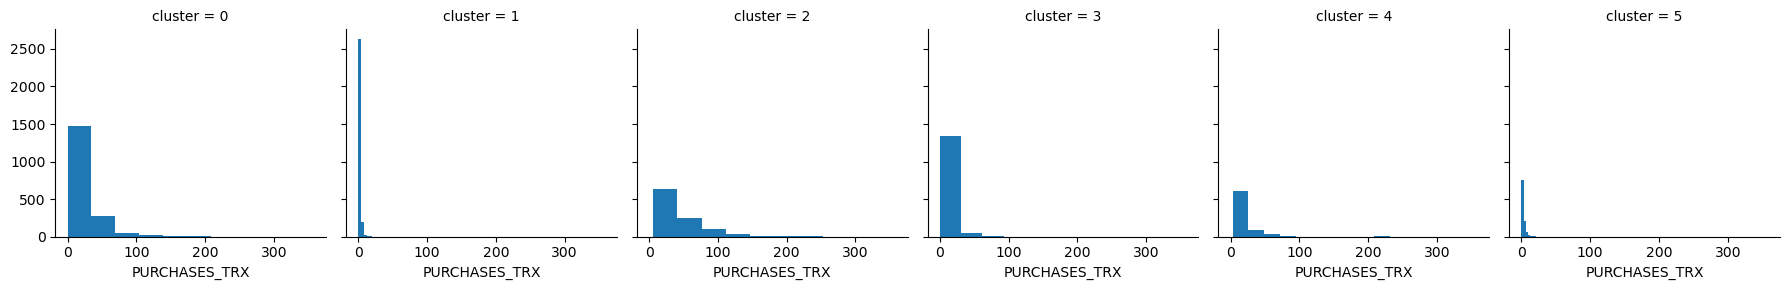

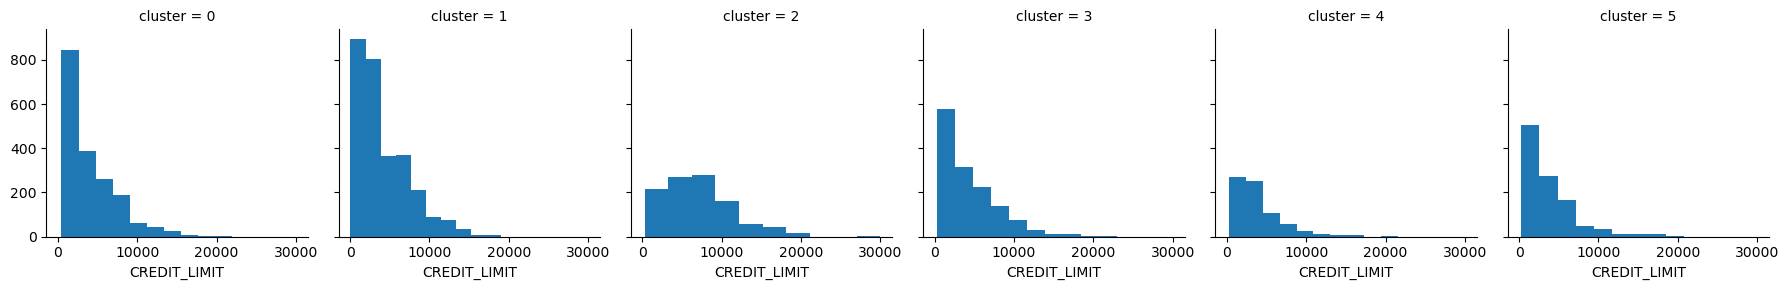

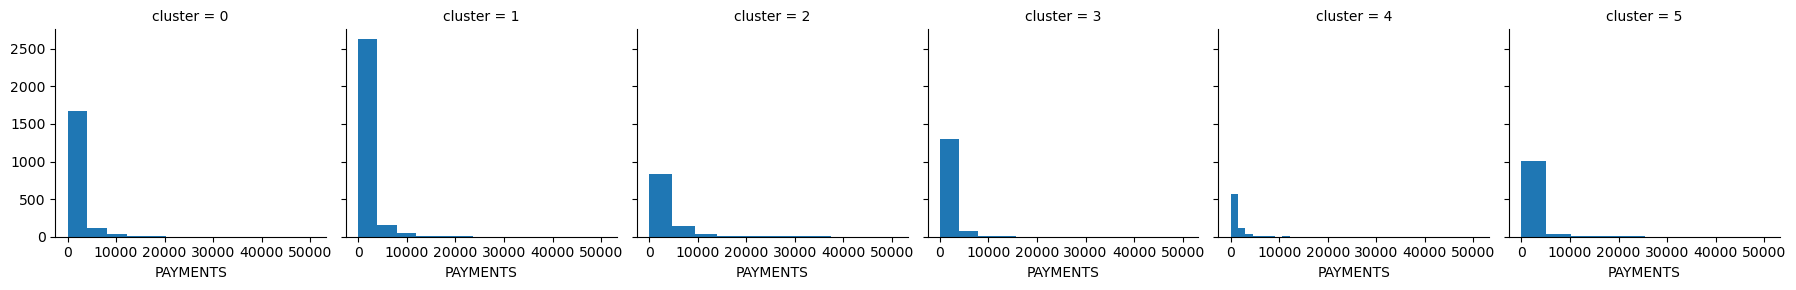

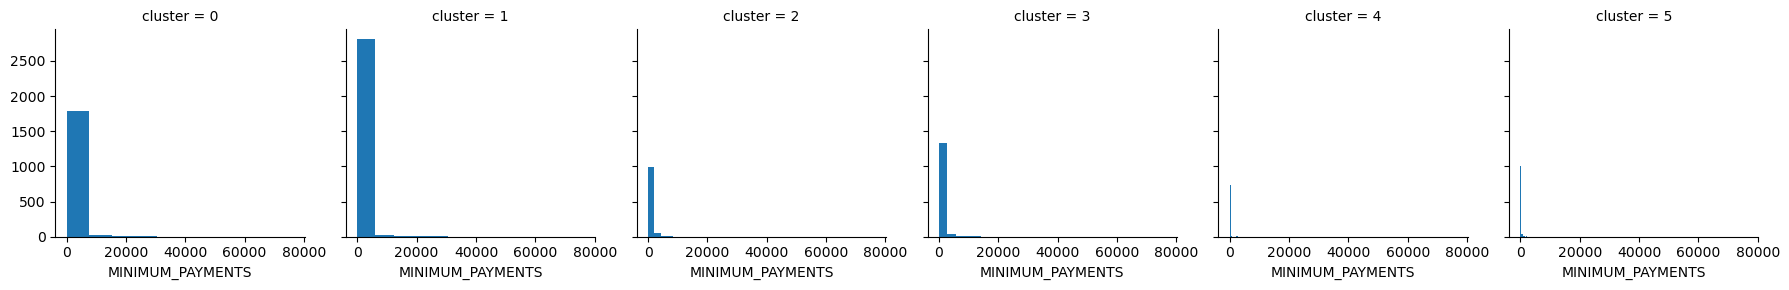

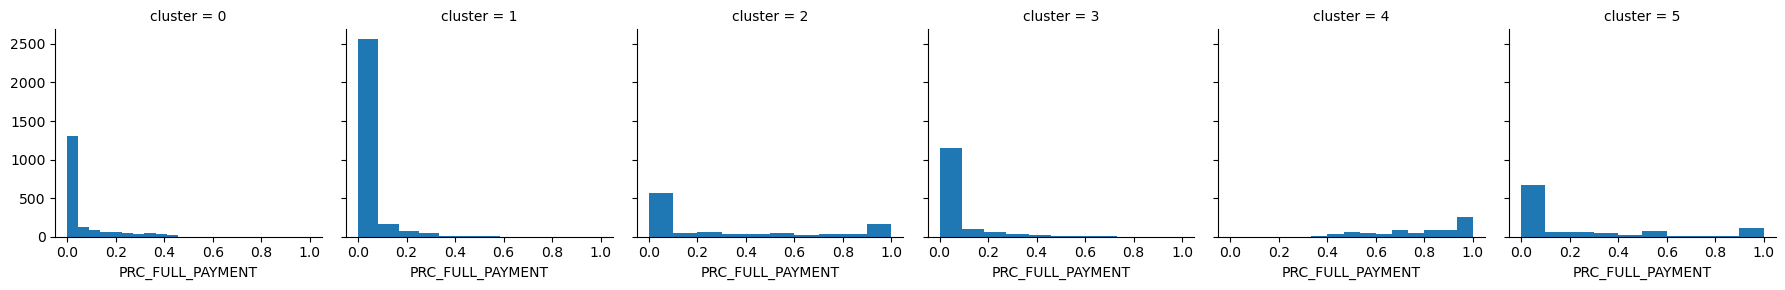

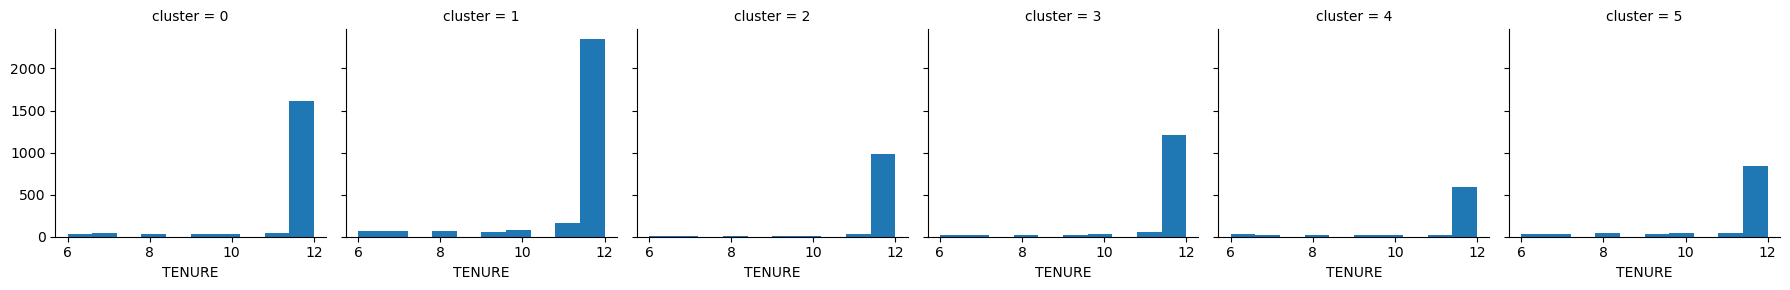

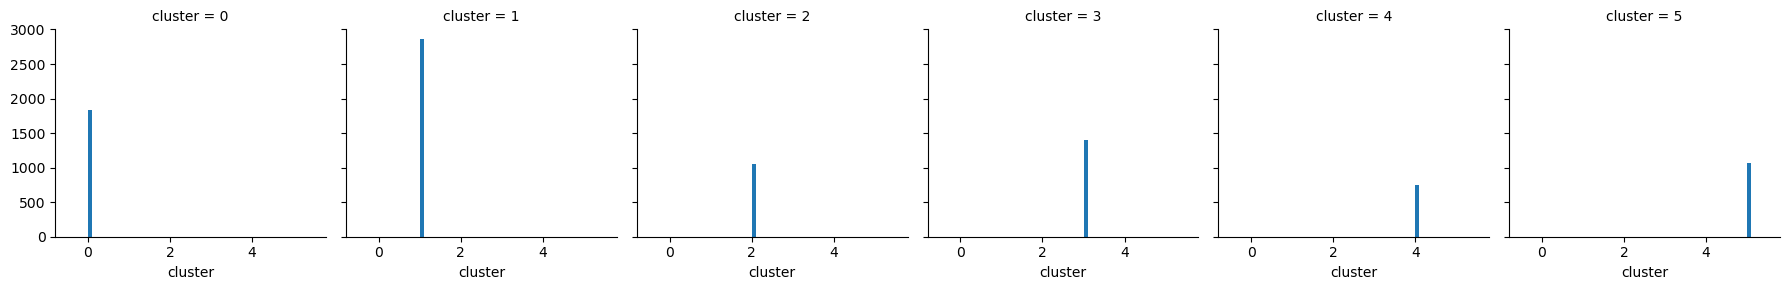

In [30]:
#Analisando o comportamento de cada atributo do dataset por cluster, com o objetivo de traçar o perfil de usuário para cada cluster
for k in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, k)

De acordo com os gráficos acima, a conclusão tirada dos perfis de usuários por cluster foi a seguinte:
    
Cluster 0 - Pessoas com saldo médio que é atualizado com frequência. Fazem muitas compras parceladas, possuem o cartão há muito tempo e possuem um limite baixo no cartão de crédito

Cluster 1 - Pessoas com saldo médio que é atualizado com muita frequência. Não fazem muitas compras, mas possuem o cartão há muito tempo e possuem um limite baixo no cartão de crédito

Cluster 2 - Pessoas com saldo médio que é atualizado com frequência. Fazem muitas compras, a maioria à vista, mas também compram parcelado e possuem um limite médio no cartão de crédito

Cluster 3 - Pessoas com saldo médio que é atualizado com frequência. Fazem compras moderadas, à vista e parcelado, e possuem um limite médio no cartão de crédito

Cluster 4 - Pessoas com saldo muito baixo que é atualizado com frequência. Fazem muitas compras parceladas e possuem um limite médio no cartão de crédito

Cluster 5 - Pessoas com saldo baixo que não é atualizado com tanta frequência. Não fazem muitas compras, mas a maioria que fazem são parceladas e possuem um limite médio no cartão de crédito

Esse análise é muito parecida com a obtida pelo algoritmo K-means